In [1]:
# Hago todas las importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargo los datos leyendo el csv y uso on_bad_lines='skip' para saltar las líneas con errores o problemas
df = pd.read_csv('../data/archivoMarketingLimpio.csv')

<Figure size 1200x600 with 0 Axes>

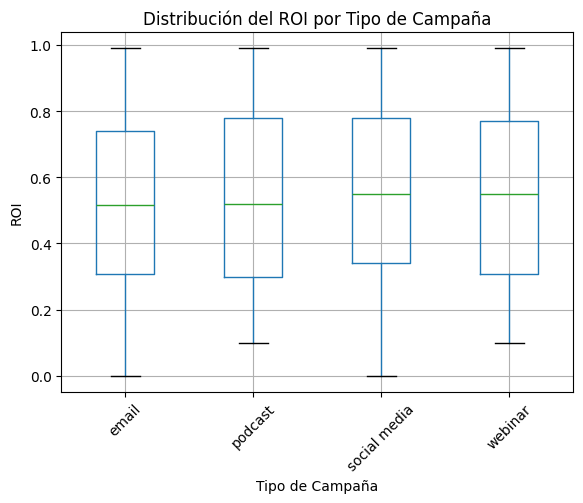

In [3]:
# Gráfico de boxplot para ROI por tipo de campaña
plt.figure(figsize=(12, 6))
df.boxplot(column='roi', by='type', rot=45)
plt.title('Distribución del ROI por Tipo de Campaña')
plt.suptitle('')  # Eliminar el título automático
plt.xlabel('Tipo de Campaña')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

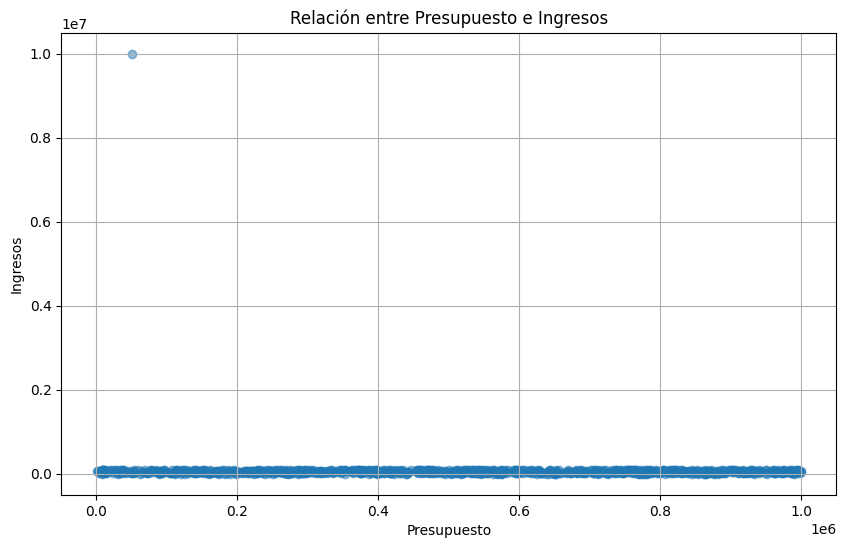

In [4]:
# Relacion entre presupuesto e ingresos
plt.figure(figsize=(10, 6))
plt.scatter(df['revenue'], df['budget'], alpha=0.5)
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

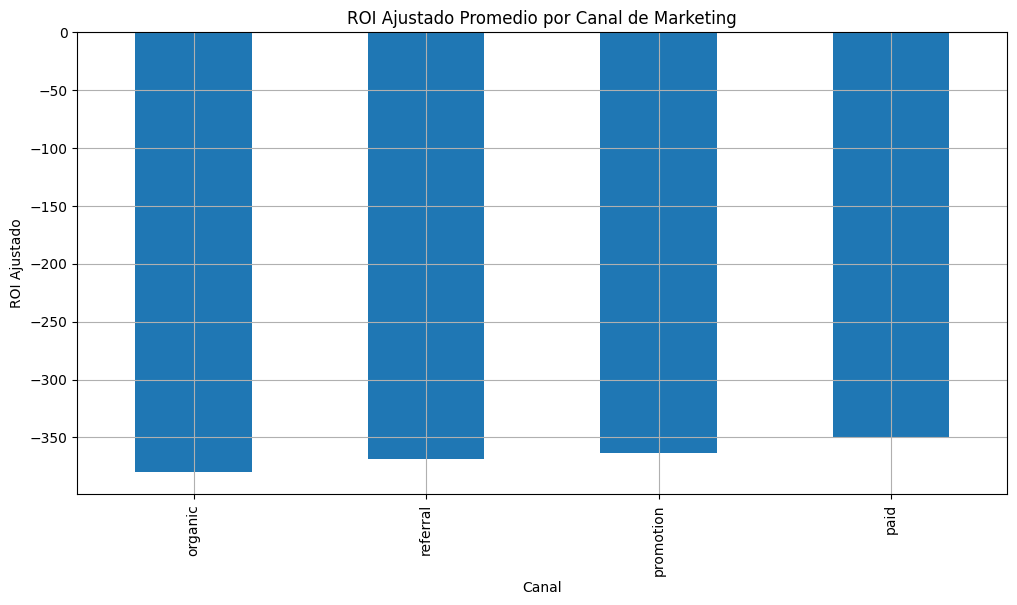

In [5]:
# ROI Ajustado por Canal de Marketing
plt.figure(figsize=(12, 6))
df.groupby('channel')['roiAjustado'].mean().sort_values().plot(kind='bar')
plt.title('ROI Ajustado Promedio por Canal de Marketing')
plt.xlabel('Canal')
plt.ylabel('ROI Ajustado')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

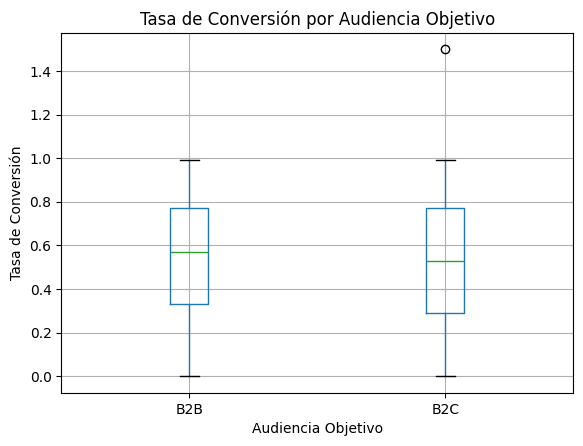

In [6]:
# Compara como varía la tasa de conversión entre b2b y b2c
plt.figure(figsize=(8, 6))
df.boxplot(column='conversion_rate', by='target_audience')
plt.title('Tasa de Conversión por Audiencia Objetivo')
plt.suptitle('')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('Tasa de Conversión')
plt.grid(True)
plt.show()

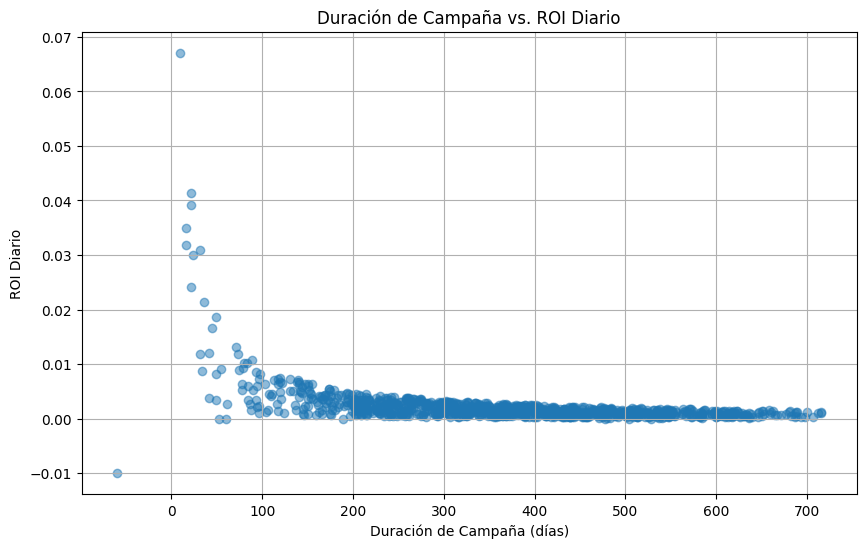

In [7]:
# Analiza si las campañas mas largas tienen mayor o menor ROI
plt.figure(figsize=(10, 6))
plt.scatter(df['duracionCampaña'], df['roiDiario'], alpha=0.5)
plt.title('Duración de Campaña vs. ROI Diario')
plt.xlabel('Duración de Campaña (días)')
plt.ylabel('ROI Diario')
plt.grid(True)
plt.show()

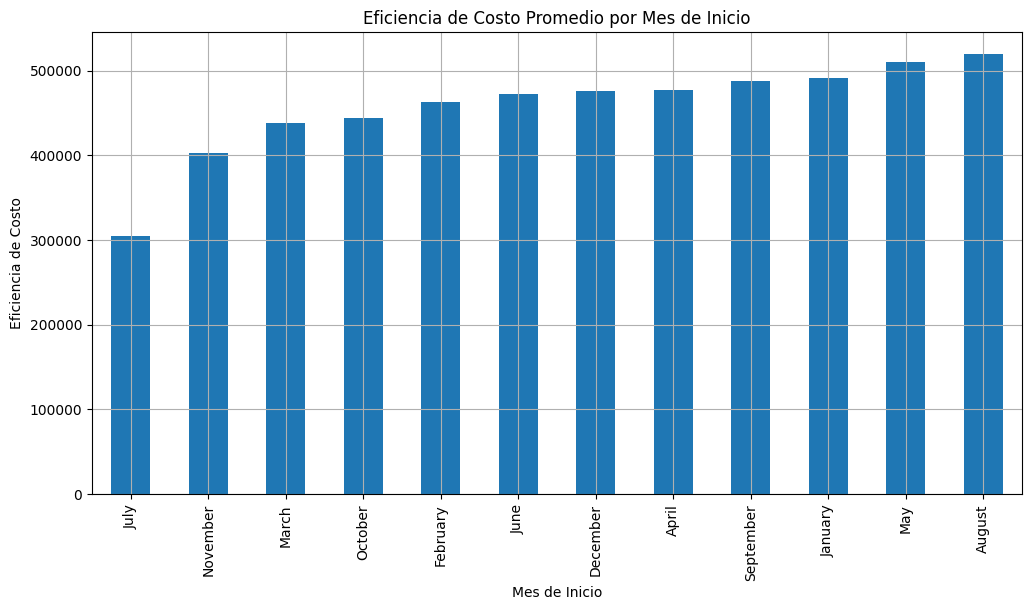

In [8]:
# Compruebo la eficiencia de costo segun el mes en el que empiece
plt.figure(figsize=(12, 6))
df.groupby('mesInicio')['eficienciaCosto'].mean().sort_values().plot(kind='bar')
plt.title('Eficiencia de Costo Promedio por Mes de Inicio')
plt.xlabel('Mes de Inicio')
plt.ylabel('Eficiencia de Costo')
plt.grid(True)
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_21156\2377063424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel', y='budget', palette='viridis')


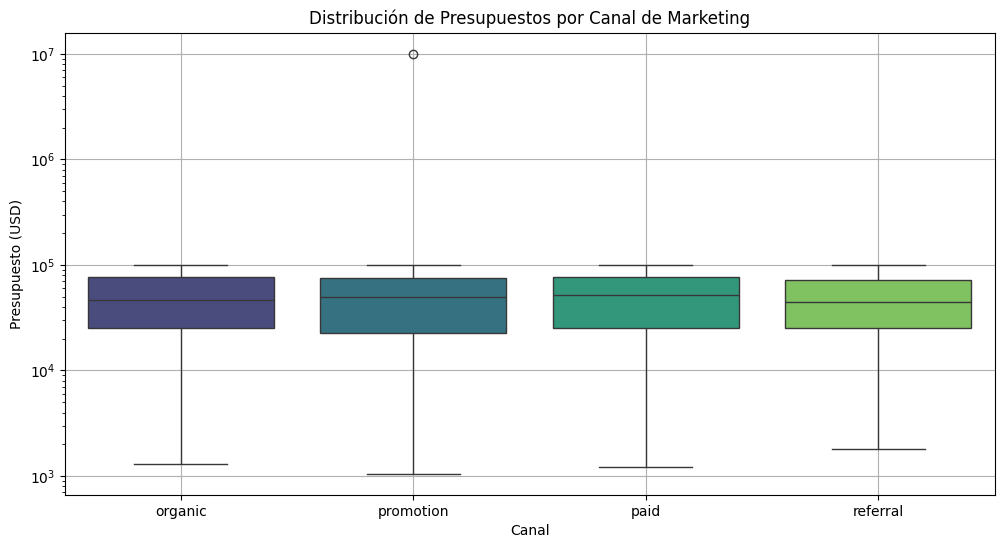

In [9]:
# Distribucion de presupuestos por tipo de canal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel', y='budget', palette='viridis')
plt.title('Distribución de Presupuestos por Canal de Marketing')
plt.xlabel('Canal')
plt.ylabel('Presupuesto (USD)')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

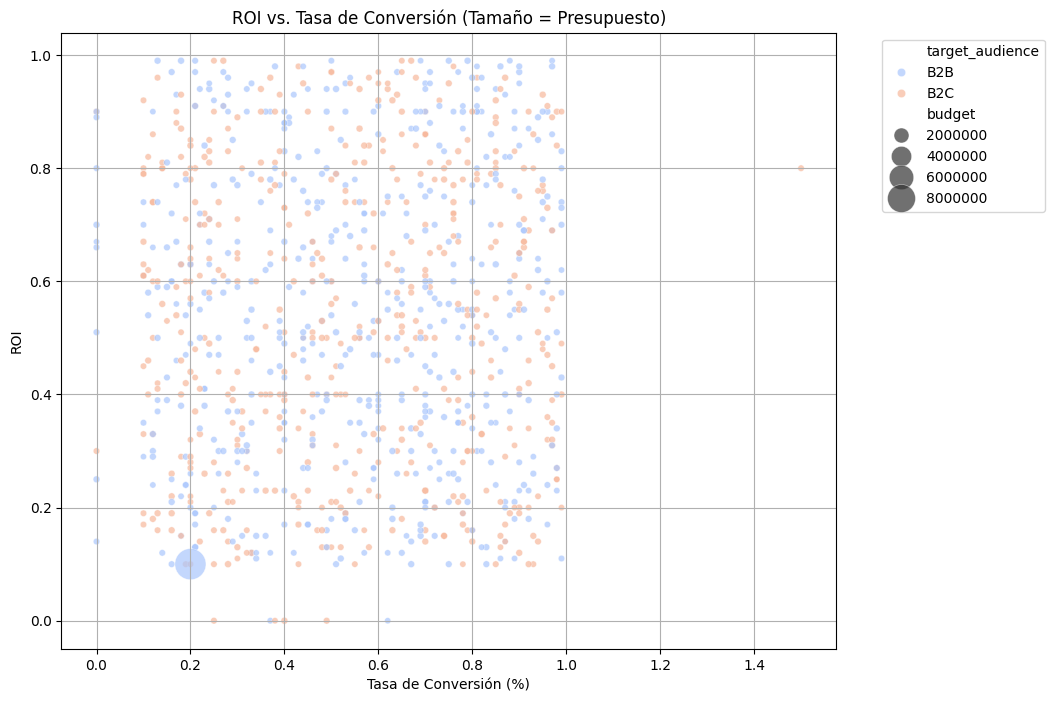

In [10]:
# Explora la relacion entre ROI y tasa de conversion diferenciando las audiencias
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='conversion_rate', y='roi', hue='target_audience', 
                size='budget', sizes=(20, 500), alpha=0.7, palette='coolwarm')
plt.title('ROI vs. Tasa de Conversión (Tamaño = Presupuesto)')
plt.xlabel('Tasa de Conversión (%)')
plt.ylabel('ROI')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

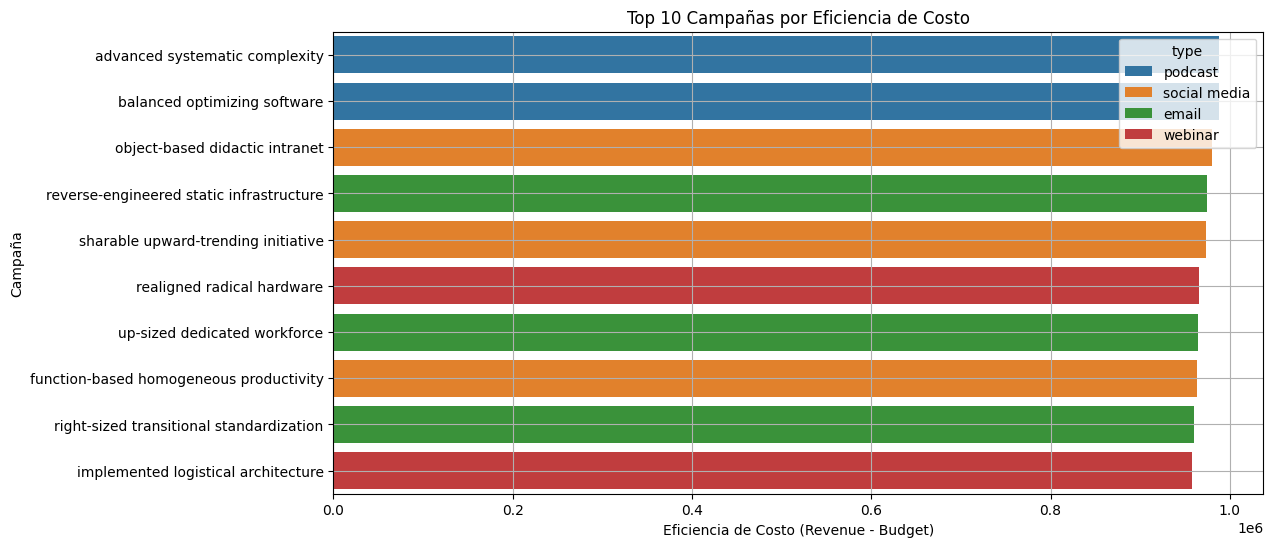

In [11]:
# Top 10 campañas con eficiencia de costo mas alta
top_10 = df.nlargest(10, 'eficienciaCosto')[['campaign_name', 'eficienciaCosto', 'type']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='eficienciaCosto', y='campaign_name', hue='type', dodge=False)
plt.title('Top 10 Campañas por Eficiencia de Costo')
plt.xlabel('Eficiencia de Costo (Revenue - Budget)')
plt.ylabel('Campaña')
plt.grid(True)
plt.show()

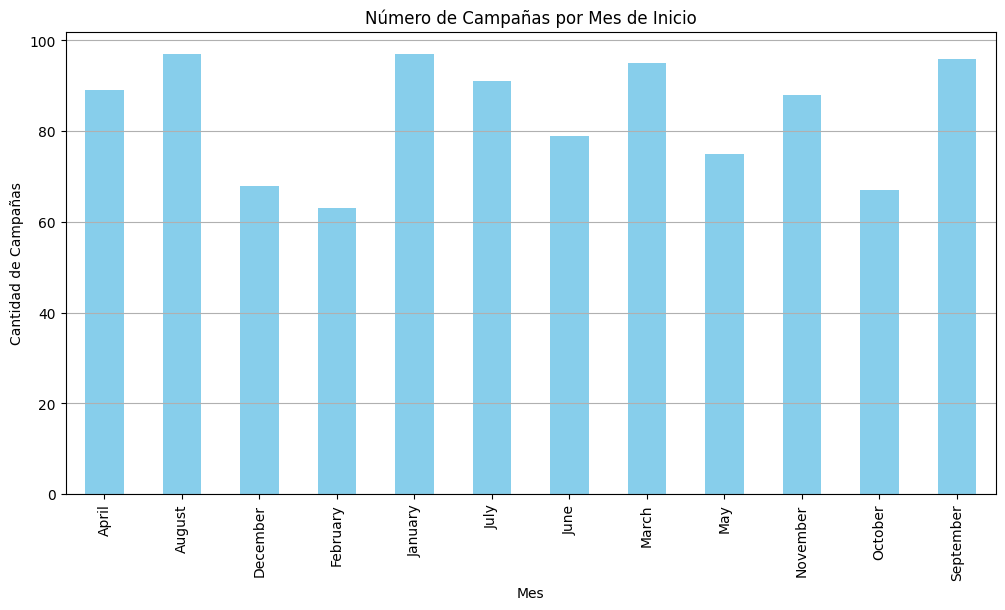

In [12]:
# Cuento cuantas campañas se han hecho en cada mes
plt.figure(figsize=(12, 6))
df['mesInicio'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Número de Campañas por Mes de Inicio')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Campañas')
plt.grid(axis='y')
plt.show()

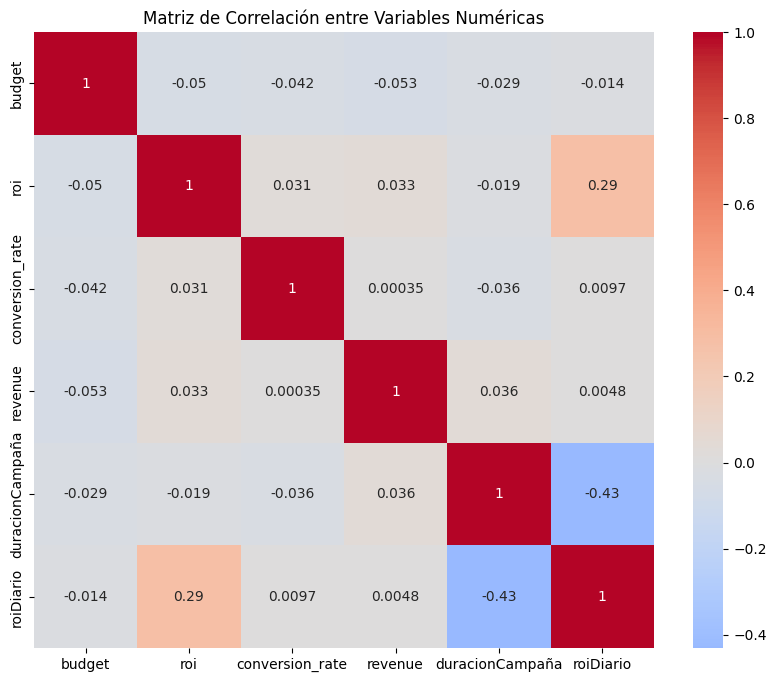

In [13]:
# Hago una correlacion entre todas las variables numéricas
numeric_cols = ['budget', 'roi', 'conversion_rate', 'revenue', 'duracionCampaña', 'roiDiario']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_21156\775556340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='estacionesInicio', y='roiDiario', palette='pastel')


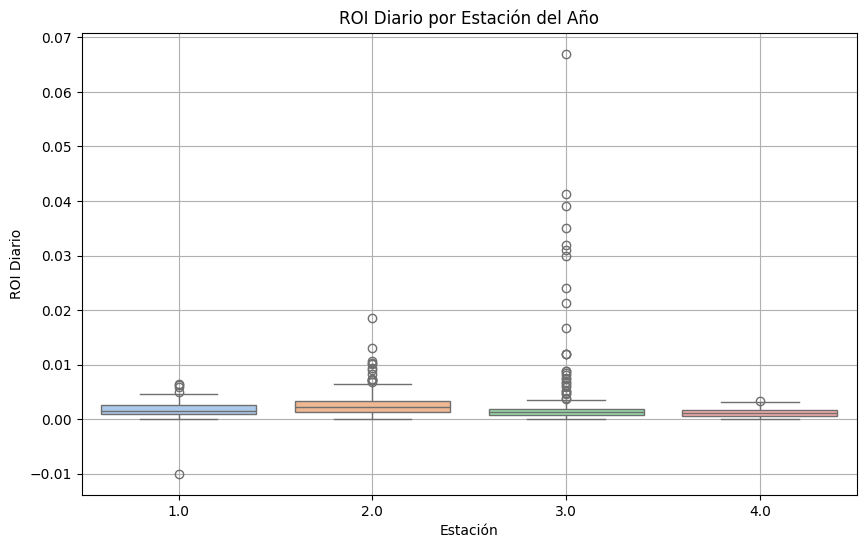

In [14]:
# ROI Diario por cada estacion del año
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='estacionesInicio', y='roiDiario', palette='pastel')
plt.title('ROI Diario por Estación del Año')
plt.xlabel('Estación')
plt.ylabel('ROI Diario')
plt.grid(True)
plt.show()

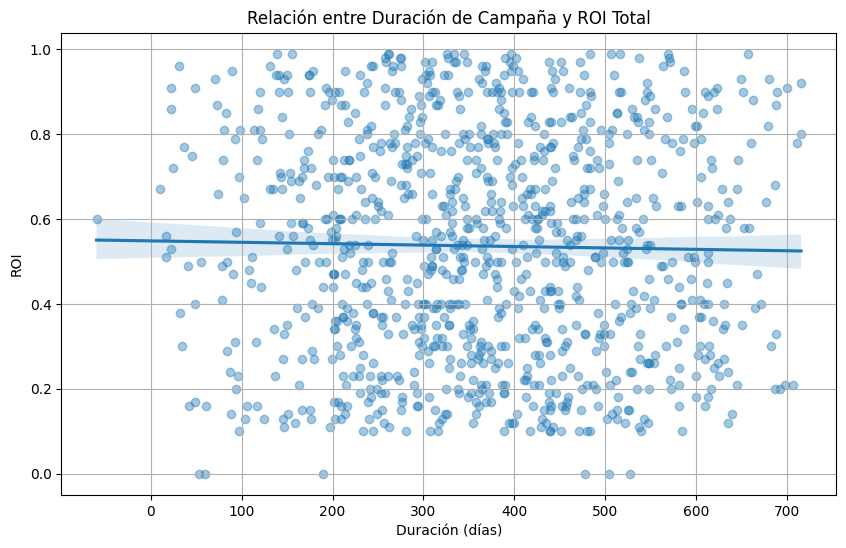

In [15]:
# Relacion entre la duracion de la campaña y el roi
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='duracionCampaña', y='roi', scatter_kws={'alpha':0.4})
plt.title('Relación entre Duración de Campaña y ROI Total')
plt.xlabel('Duración (días)')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

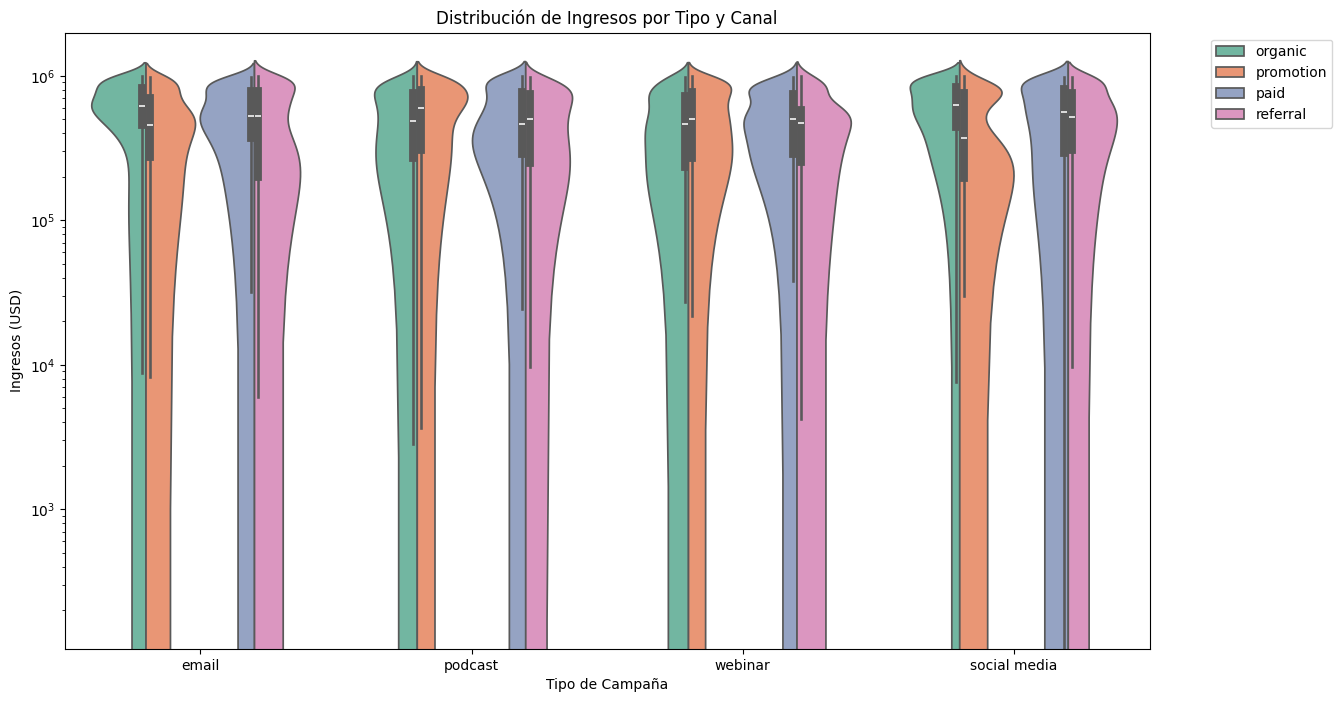

In [16]:
# Distribucion de ingresos por tipo y canal
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='type', y='revenue', hue='channel', split=True, palette='Set2')
plt.title('Distribución de Ingresos por Tipo y Canal')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Ingresos (USD)')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

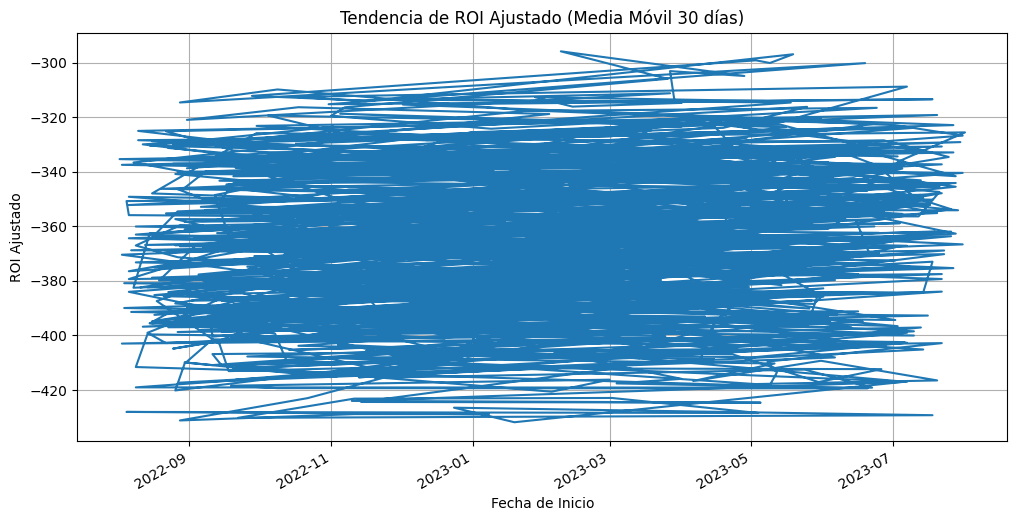

In [17]:
# Tendencia de ROI Ajustado
df['start_date'] = pd.to_datetime(df['start_date'])  # Convertir a datetime
df.set_index('start_date')['roiAjustado'].rolling(window=30).mean().plot(figsize=(12, 6))
plt.title('Tendencia de ROI Ajustado (Media Móvil 30 días)')
plt.xlabel('Fecha de Inicio')
plt.ylabel('ROI Ajustado')
plt.grid(True)
plt.show()

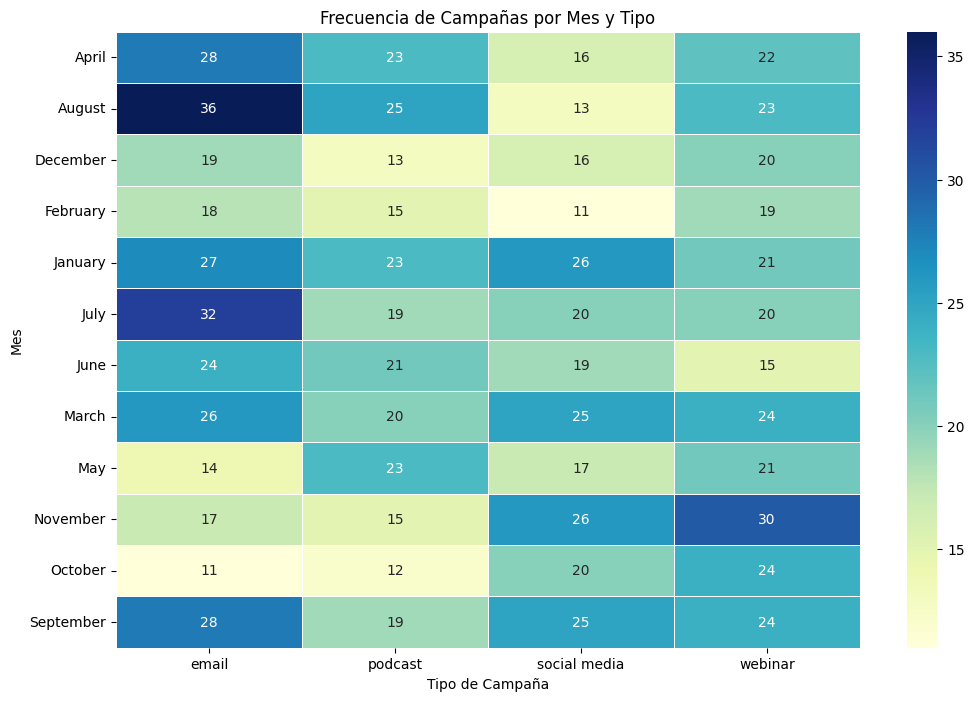

In [18]:
# Frecuencia de campañas por mes y tipo
# Crear tabla pivote: conteo de campañas por mes y tipo
pivot_table = df.pivot_table(index='mesInicio', columns='type', values='campaign_name', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Frecuencia de Campañas por Mes y Tipo')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Mes')
plt.show()

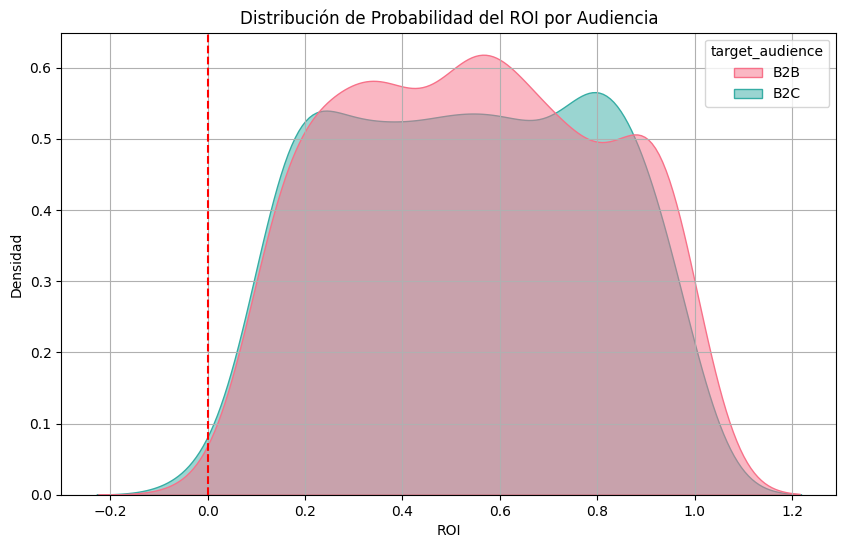

In [19]:
# Distribucion de probabilidad de ROI por audiencia
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='roi', hue='target_audience', fill=True, palette='husl', alpha=0.5)
plt.title('Distribución de Probabilidad del ROI por Audiencia')
plt.xlabel('ROI')
plt.ylabel('Densidad')
plt.axvline(x=0, color='red', linestyle='--')  # Línea de ROI cero
plt.grid(True)
plt.show()

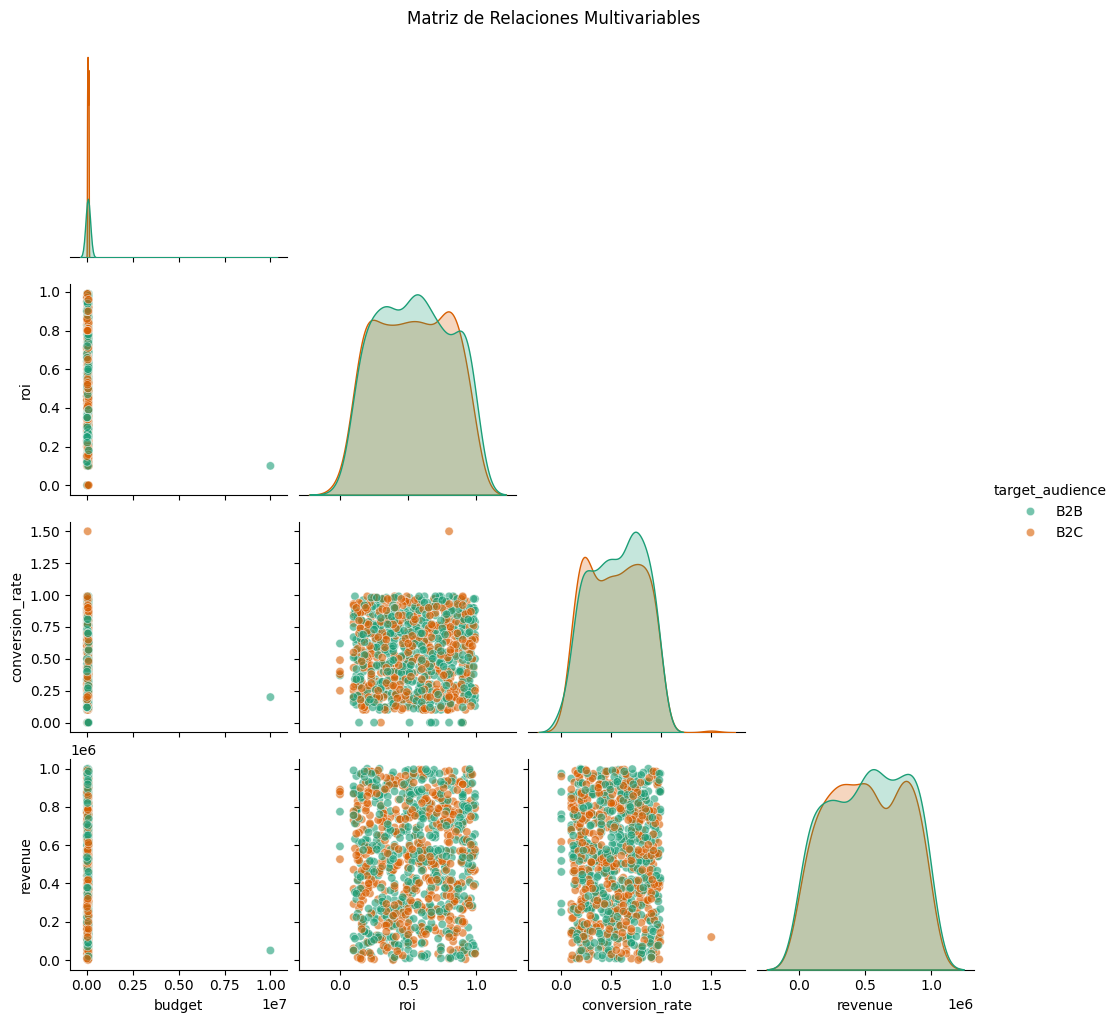

In [20]:
# Exploro interacciones entre multiples variables
sns.pairplot(df[['budget', 'roi', 'conversion_rate', 'revenue', 'target_audience']], 
             hue='target_audience', palette='Dark2', corner=True, plot_kws={'alpha':0.6})
plt.suptitle('Matriz de Relaciones Multivariables', y=1.02)
plt.show()

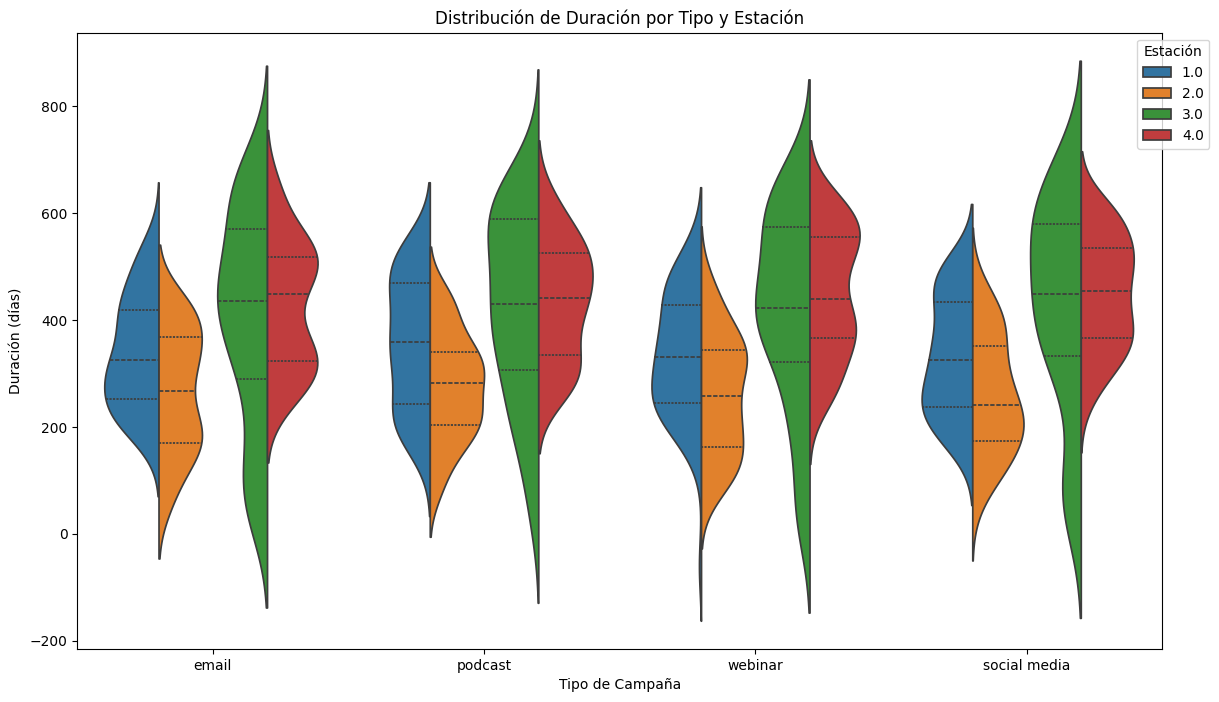

In [21]:
# Analizo como varía la duracion por tipo y estacion
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='type', y='duracionCampaña', hue='estacionesInicio', 
               split=True, palette='tab10', inner='quartile')
plt.title('Distribución de Duración por Tipo y Estación')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Duración (días)')
plt.legend(bbox_to_anchor=(1.05, 1), title='Estación')
plt.show()

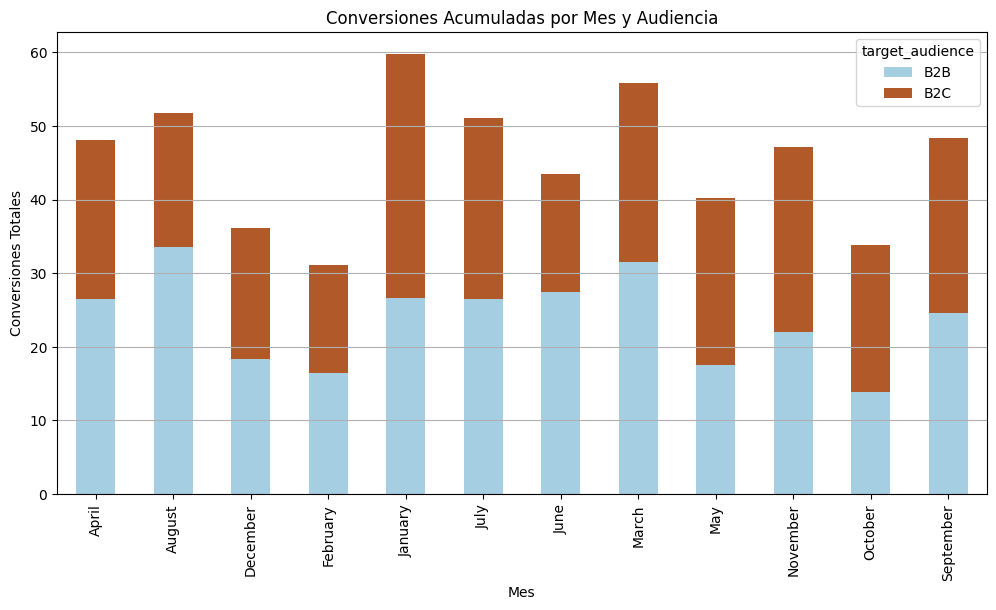

In [22]:
# Conversiones acumuladas por mes y audiencia
pivot_conv = df.pivot_table(index='mesInicio', columns='target_audience', 
                            values='conversion_rate', aggfunc='sum', fill_value=0)

pivot_conv.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Conversiones Acumuladas por Mes y Audiencia')
plt.xlabel('Mes')
plt.ylabel('Conversiones Totales')
plt.grid(axis='y')
plt.show()

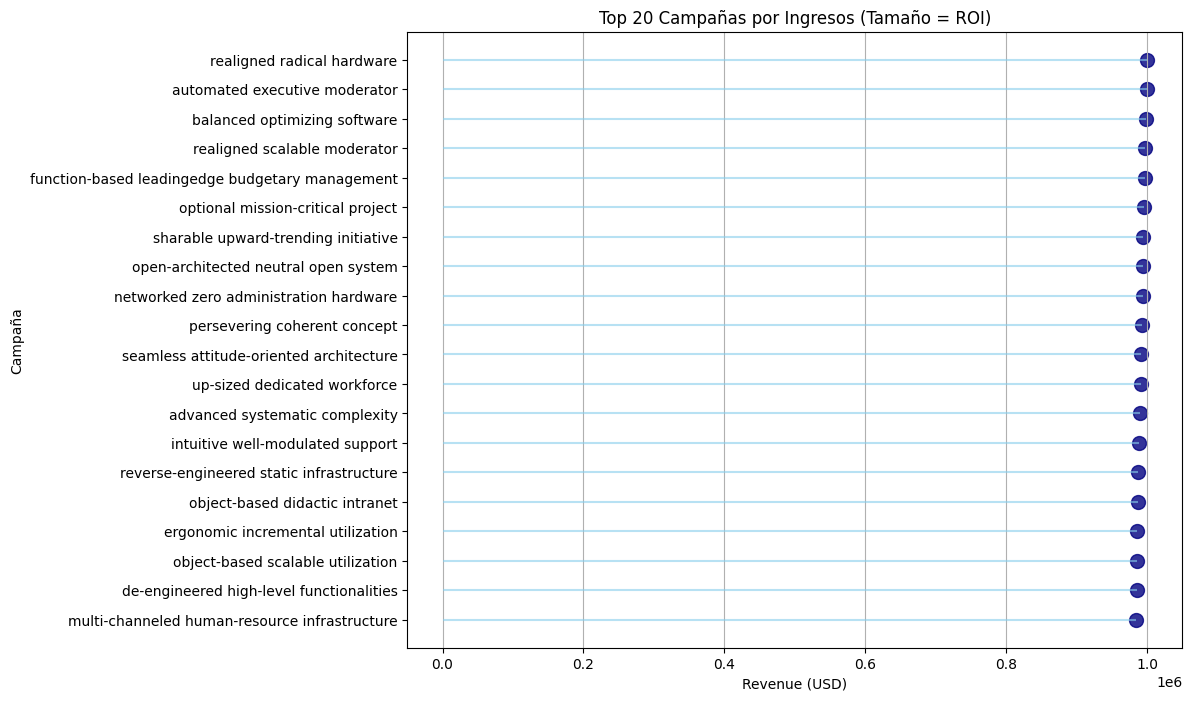

In [23]:
# TOP 20 campañas con mayores ingresos y su ROI
top20 = df.nlargest(20, 'revenue')[['campaign_name', 'revenue', 'roi']].sort_values('revenue')

plt.figure(figsize=(10, 8))
plt.hlines(y=top20['campaign_name'], xmin=0, xmax=top20['revenue'], color='skyblue', alpha=0.6)
plt.scatter(top20['revenue'], top20['campaign_name'], color='navy', alpha=0.8, s=100)
plt.title('Top 20 Campañas por Ingresos (Tamaño = ROI)')
plt.xlabel('Revenue (USD)')
plt.ylabel('Campaña')
plt.grid(axis='x')
plt.show()

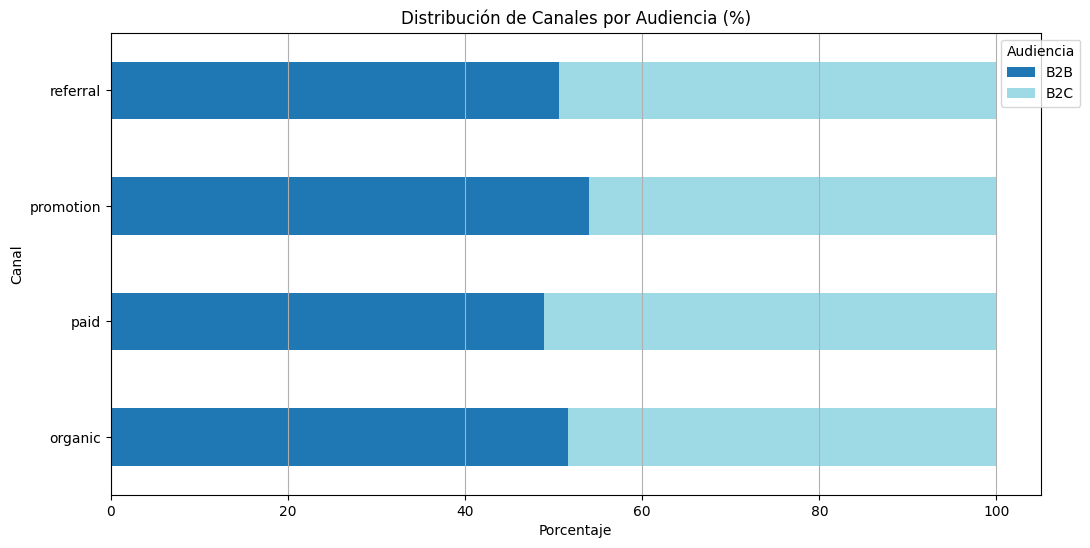

In [24]:
# Distribucion de canales por audiencia
channel_audience = df.groupby(['channel', 'target_audience']).size().unstack()

channel_audience_percent = channel_audience.div(channel_audience.sum(axis=1), axis=0) * 100

channel_audience_percent.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Distribución de Canales por Audiencia (%)')
plt.xlabel('Porcentaje')
plt.ylabel('Canal')
plt.legend(title='Audiencia', bbox_to_anchor=(1.05, 1))
plt.grid(axis='x')
plt.show()